In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

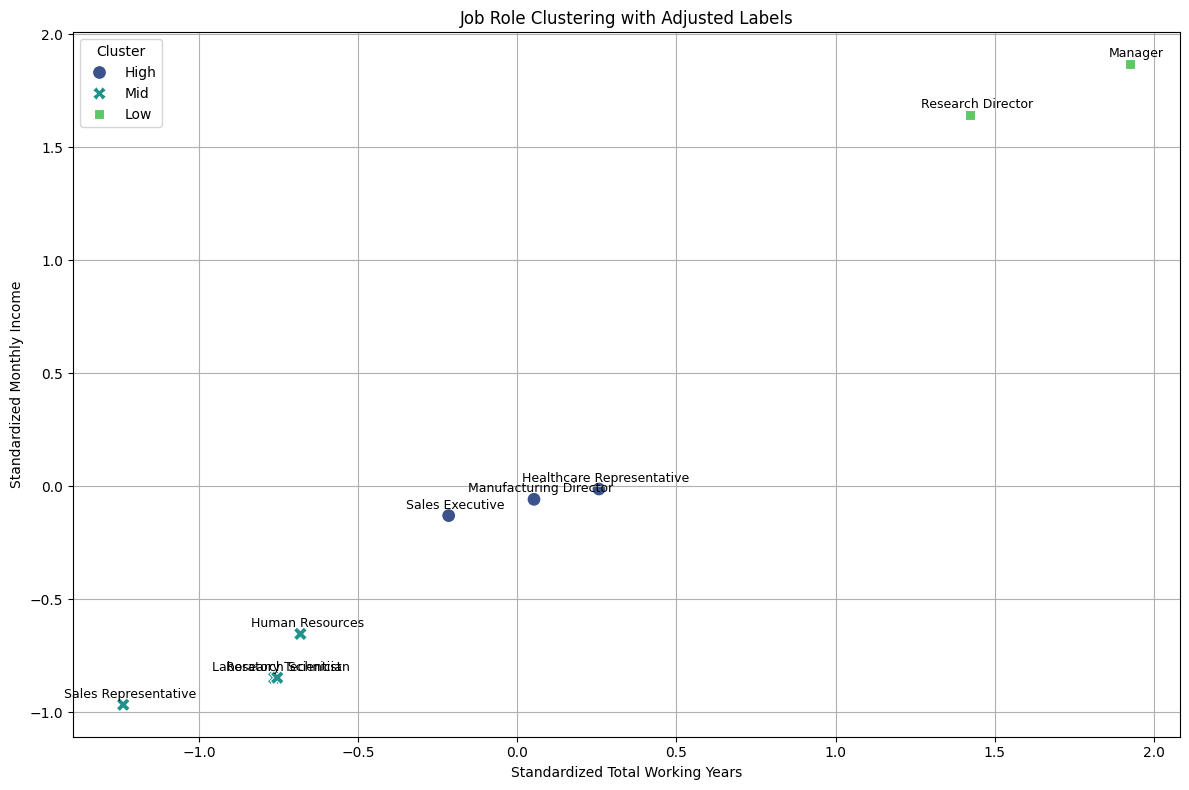

In [3]:
# Load the data
file_path = "Data.csv"
data = pd.read_csv(file_path)

# Group by JobRole and calculate average TotalWorkingYears and MonthlyIncome
job_role_data = data.groupby('JobRole').agg({
    'TotalWorkingYears': 'mean',
    'MonthlyIncome': 'mean'
}).reset_index()

# Standardizing the data for clustering
scaler = StandardScaler()
job_role_data[['TotalWorkingYears', 'MonthlyIncome']] = scaler.fit_transform(
    job_role_data[['TotalWorkingYears', 'MonthlyIncome']]
)

# Applying KMeans clustering into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
job_role_data['Cluster'] = kmeans.fit_predict(
    job_role_data[['TotalWorkingYears', 'MonthlyIncome']]
)

# Mapping clusters to Low, Mid, High categories based on the cluster centroids
centroids = kmeans.cluster_centers_
cluster_labels = ['Low', 'Mid', 'High']
job_role_data['Cluster_Label'] = job_role_data['Cluster'].map(
    lambda x: cluster_labels[x]
)

# Improved scatter plot with padding and adjusted label for 'Lab Technician'
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=job_role_data,
    x='TotalWorkingYears',
    y='MonthlyIncome',
    hue='Cluster_Label',
    style='Cluster_Label',
    palette='viridis',
    s=100
)

# Adding job role labels with padding and specific adjustment for 'Lab Technician'
for i, row in job_role_data.iterrows():
    # Adjust 'Lab Technician' position specifically
    if row['JobRole'] == 'Lab Technician':
        plt.annotate(
            row['JobRole'],
            (row['TotalWorkingYears'], row['MonthlyIncome']),
            textcoords="offset points",
            xytext=(0, -15),  # Position below the point
            ha='center',
            fontsize=9,
            color='black',
            weight='normal'
        )
    else:
        plt.annotate(
            row['JobRole'],
            (row['TotalWorkingYears'], row['MonthlyIncome']),
            textcoords="offset points",
            xytext=(5, 5),  # General padding
            ha='center',
            fontsize=9,
            color='black',
            weight='normal'
        )

plt.title('Job Role Clustering with Adjusted Labels')
plt.xlabel('Standardized Total Working Years')
plt.ylabel('Standardized Monthly Income')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_724550/626193611.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clusters, y=attrition_rates, palette=['#5E81AC', '#A3BE8C', '#EBCB8B'], ax=ax[1])  # Soft colors


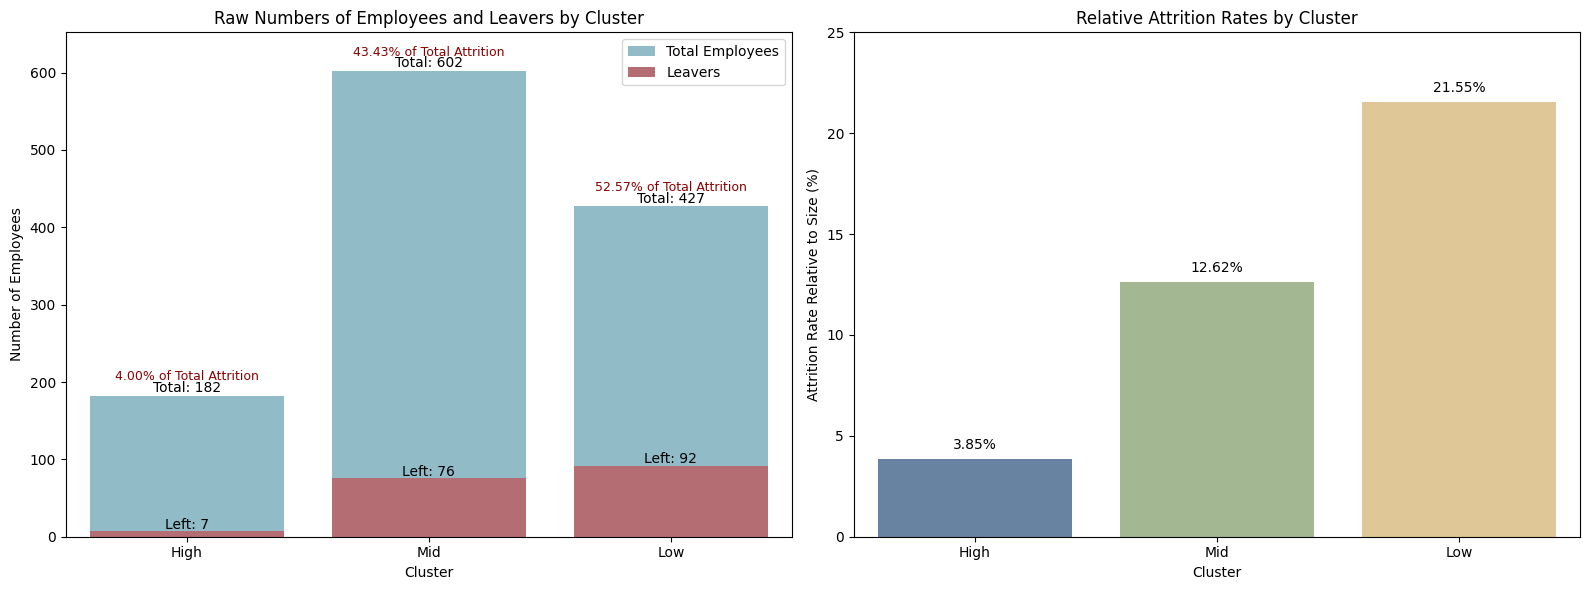

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is already loaded in 'data' from the previous context

# Define the cluster mapping based on provided roles
cluster_mapping = {
    'Manager': 'High',
    'Research Director': 'High',
    'Healthcare Representative': 'Mid',
    'Manufacturing Director': 'Mid',
    'Sales Executive': 'Mid',
    'Human Resources': 'Low',
    'Research Scientist': 'Low',
    'Lab Technician': 'Low',
    'Sales Representative': 'Low'
}

# Add a cluster column based on the mapping
data['Cluster'] = data['JobRole'].map(cluster_mapping)

# Count total employees and those who left (attrition) in each cluster
cluster_counts = data.groupby('Cluster').agg(
    total_employees=('Attrition', 'count'),
    leavers=('Attrition', lambda x: (x == 'Yes').sum())
).reset_index()

# Calculate attrition rates relative to cluster sizes
cluster_counts['attrition_rate'] = (cluster_counts['leavers'] / cluster_counts['total_employees']) * 100

# Calculate the percentage of total attrition each cluster constitutes
total_attrition = cluster_counts['leavers'].sum()
cluster_counts['attrition_percentage'] = (cluster_counts['leavers'] / total_attrition) * 100

# Reorder the clusters to display as High, Mid, Low
cluster_counts['Cluster'] = pd.Categorical(cluster_counts['Cluster'], categories=['High', 'Mid', 'Low'], ordered=True)
cluster_counts = cluster_counts.sort_values('Cluster')

# Updated data for plotting
clusters = cluster_counts['Cluster']
total_employees = cluster_counts['total_employees']
leavers = cluster_counts['leavers']
attrition_rates = cluster_counts['attrition_rate']
attrition_percentages = cluster_counts['attrition_percentage']

# Create a figure with two subplots with updated order
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Raw numbers of employees and leavers ordered by High, Mid, Low
sns.barplot(x=clusters, y=total_employees, color='#88C0D0', ax=ax[0], label='Total Employees')  # Soft blue
sns.barplot(x=clusters, y=leavers, color='#BF616A', ax=ax[0], label='Leavers')  # Soft red
ax[0].set_title('Raw Numbers of Employees and Leavers by Cluster')
ax[0].set_ylabel('Number of Employees')
ax[0].set_xlabel('Cluster')
ax[0].legend()

# Add data labels
for i, (total, left, perc) in enumerate(zip(total_employees, leavers, attrition_percentages)):
    ax[0].text(i, total + 5, f'Total: {total}', ha='center', fontsize=10, color='black')
    ax[0].text(i, left + 3, f'Left: {left}', ha='center', fontsize=10, color='black')
    ax[0].text(i, max(total, left) + 50, f'{perc:.2f}% of Total Attrition', ha='center', fontsize=9, color='darkred')
    ax[0].set_ylim(0, max(total_employees) + 50)  # Add some margin at the top

# Second subplot: Attrition rates relative to cluster sizes ordered by High, Mid, Low
sns.barplot(x=clusters, y=attrition_rates, palette=['#5E81AC', '#A3BE8C', '#EBCB8B'], ax=ax[1])  # Soft colors
ax[1].set_title('Relative Attrition Rates by Cluster')
ax[1].set_ylabel('Attrition Rate Relative to Size (%)')
ax[1].set_xlabel('Cluster')
ax[1].set_ylim(0, 25)

# Add data labels
for index, rate in enumerate(attrition_rates):
    ax[1].text(index, rate + 0.5, f'{rate:.2f}%', ha='center', fontsize=10, color='black')

# Show the updated plots
plt.tight_layout()
plt.show()


/home/islam/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


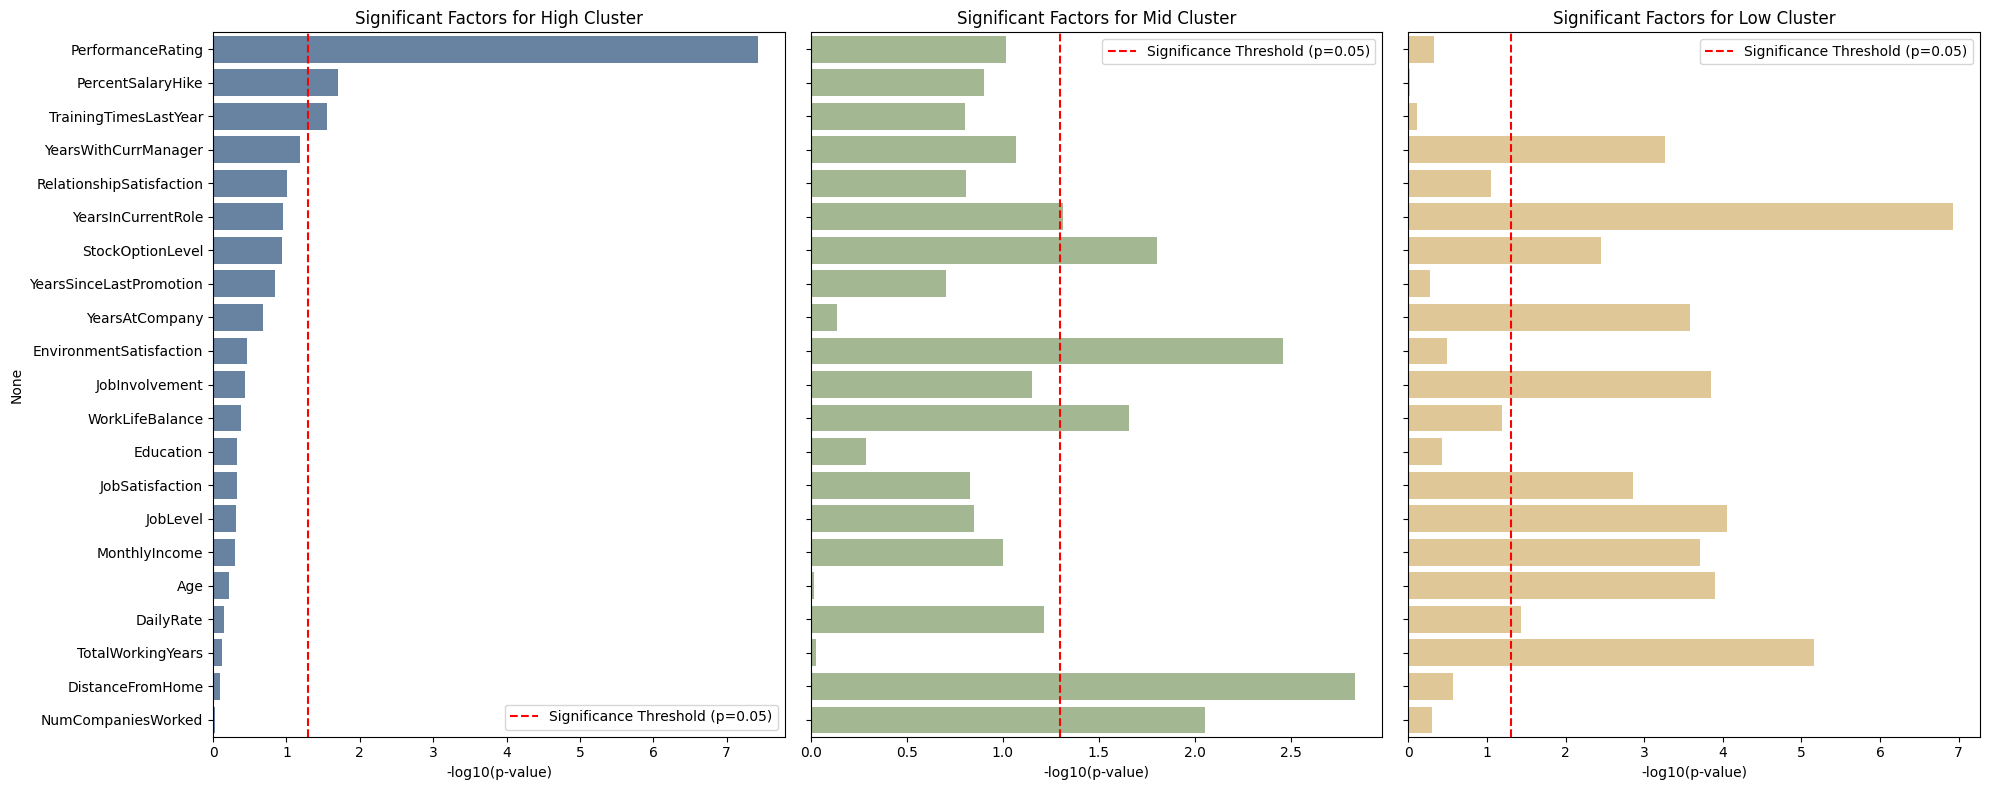

In [5]:
import scipy.stats as stats
import numpy as np

# Define the columns to analyze correlations with attrition
# Exclude columns that are not relevant or numerical
columns_to_analyze = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Create a dictionary to store p-values for each cluster
p_values_clusters = {'High': {}, 'Mid': {}, 'Low': {}}

# Calculate p-values for each cluster and each factor
for cluster in p_values_clusters.keys():
    cluster_data = data[data['Cluster'] == cluster]
    for column in columns_to_analyze:
        # Perform t-test between attrition ('Yes' vs 'No') for each variable
        attrition_yes = cluster_data[cluster_data['Attrition'] == 'Yes'][column]
        attrition_no = cluster_data[cluster_data['Attrition'] == 'No'][column]
        # Use t-test to find significance
        _, p_value = stats.ttest_ind(attrition_yes, attrition_no, nan_policy='omit', equal_var=False)
        p_values_clusters[cluster][column] = p_value

# Convert p-values into a DataFrame for better visualization
p_values_df = pd.DataFrame(p_values_clusters)

# Rank the most significant factors for each cluster by sorting by p-value
ranked_factors = {cluster: p_values_df[cluster].sort_values() for cluster in p_values_clusters.keys()}

# Plotting the significant factors and their p-values for each cluster
fig, ax = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

# Define colors for each cluster for the plots
colors = ['#5E81AC', '#A3BE8C', '#EBCB8B']

for i, (cluster, ranked) in enumerate(ranked_factors.items()):
    sns.barplot(
        y=ranked.index,
        x=-np.log10(ranked.values),  # Use -log10(p-value) to better visualize significance
        ax=ax[i],
        color=colors[i]
    )
    ax[i].set_title(f'Significant Factors for {cluster} Cluster')
    ax[i].set_xlabel('-log10(p-value)')
    ax[i].axvline(-np.log10(0.05), color='red', linestyle='--', label='Significance Threshold (p=0.05)')
    ax[i].legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_724550/866980992.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_724550/866980992.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_724550/866980992.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


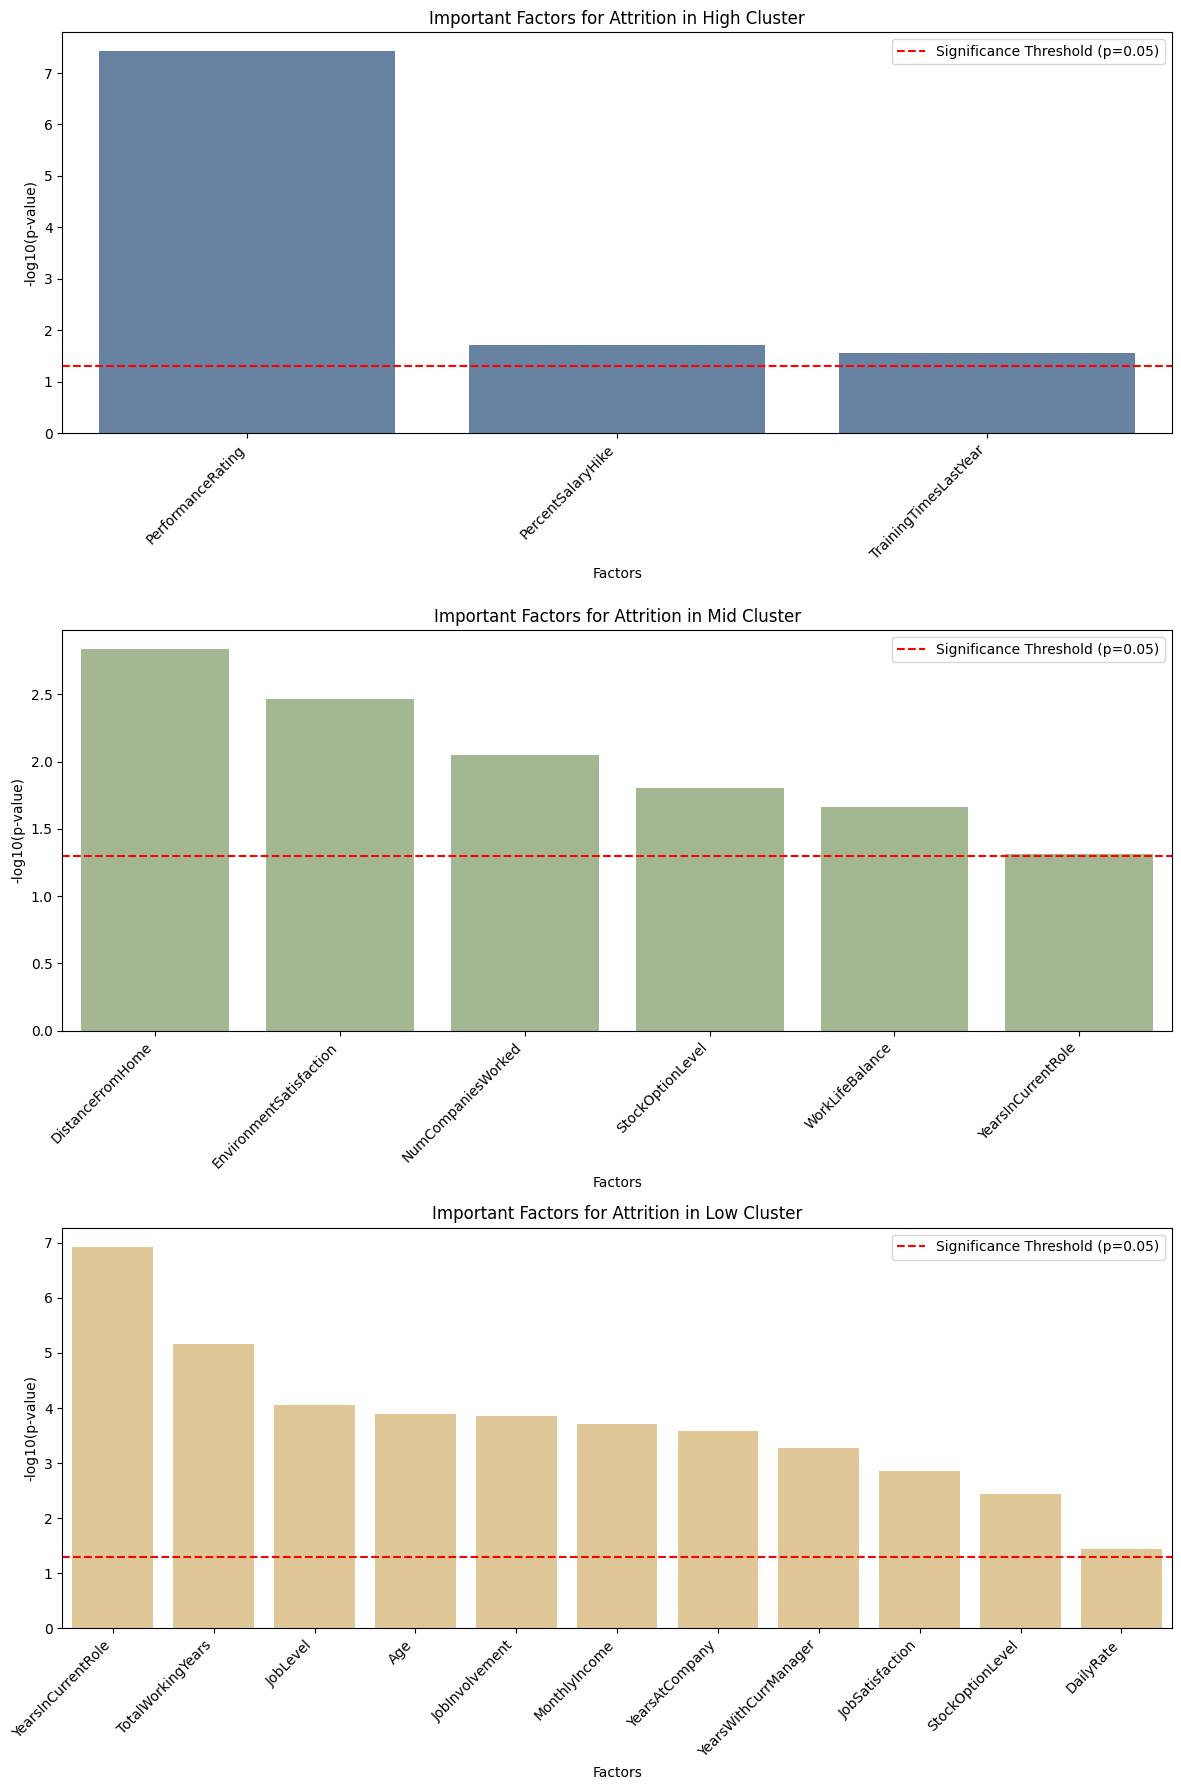

In [6]:
significant_factors = {
    cluster: ranked[ranked < 0.05] for cluster, ranked in ranked_factors.items()
}

# Plotting the significant factors for each cluster separately as individual bar graphs
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Define colors for each cluster
colors = ['#5E81AC', '#A3BE8C', '#EBCB8B']

# Plot each cluster's significant factors separately
for i, (cluster, factors) in enumerate(significant_factors.items()):
    sns.barplot(
        x=factors.index,
        y=-np.log10(factors.values),  # Use -log10(p-value) for clear significance representation
        ax=axes[i],
        color=colors[i]
    )
    axes[i].set_title(f'Important Factors for Attrition in {cluster} Cluster')
    axes[i].set_ylabel('-log10(p-value)')
    axes[i].axhline(-np.log10(0.05), color='red', linestyle='--', label='Significance Threshold (p=0.05)')
    axes[i].legend()# Find common significant factors across all clusters
common_factors = set(significant_factors['Mid'].index).intersection(
    significant_factors['Mid'].index,
    significant_factors['Low'].index
)

# Print the common significant factors
print("Common significant factors across all clusters:", common_factors)

plt.tight_layout()
plt.show()

Common significant factors across all clusters: {'StockOptionLevel', 'YearsInCurrentRole'}
